# Импорт библиотек

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import ast

# EDA

In [4]:
train = pd.read_parquet('./data/train.parquet', engine='pyarrow')

In [5]:
train.head()

,id,dates,values,label
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      80000 non-null  int64  
 1   dates   80000 non-null  object 
 2   values  80000 non-null  object 
 3   label   80000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [35]:
train.label.value_counts()

label
0.0    57820
1.0    22180
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='Count'>

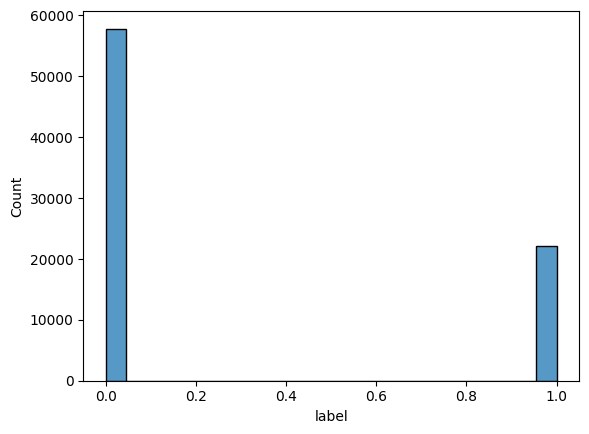

In [10]:
sns.histplot(data=train, x='label')

Несбаллансированное распределение, надо будет размывать его для норм обучения дерева.

In [40]:
train['values'] = train['values'].apply(lambda x: np.array(x))

In [43]:
train['mean'] = train['values'].apply(np.mean)
train['std'] = train['values'].apply(np.std)
train['min'] = train['values'].apply(np.min)
train['max'] = train['values'].apply(np.max)
train.head()

,id,dates,values,label,mean,std,min,max
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0,0.023710,1.337272,-4.840000,3.49
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0,-0.310777,1.556337,-3.534409,2.92
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0,-0.046042,1.065023,-1.950000,2.61
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0,-0.130000,1.158201,-2.220000,2.49
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0,-0.270536,1.270529,-2.500000,2.87


In [62]:
train[train['mean'].isnull()]['id'].count()

np.int64(88)

In [64]:
train = train[~train['mean'].isnull()]

In [65]:
train[train['mean'].isnull()]['id'].count()

np.int64(0)

In [66]:
train['mean'] = train['values'].apply(np.mean)
train['std'] = train['values'].apply(np.std)
train['min'] = train['values'].apply(np.min)
train['max'] = train['values'].apply(np.max)

C:\Users\Wh1te\AppData\Local\Temp\ipykernel_16740\3484075624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['mean'] = train['values'].apply(np.mean)
C:\Users\Wh1te\AppData\Local\Temp\ipykernel_16740\3484075624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['std'] = train['values'].apply(np.std)
C:\Users\Wh1te\AppData\Local\Temp\ipykernel_16740\3484075624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

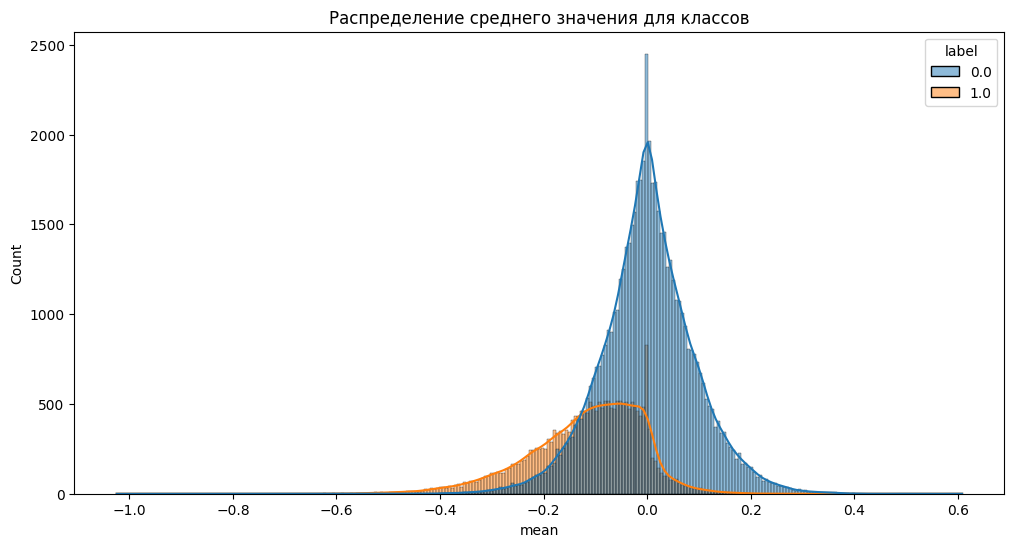

In [68]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train, x='mean', hue='label', kde=True)
plt.title('Распределение среднего значения для классов')
plt.show()

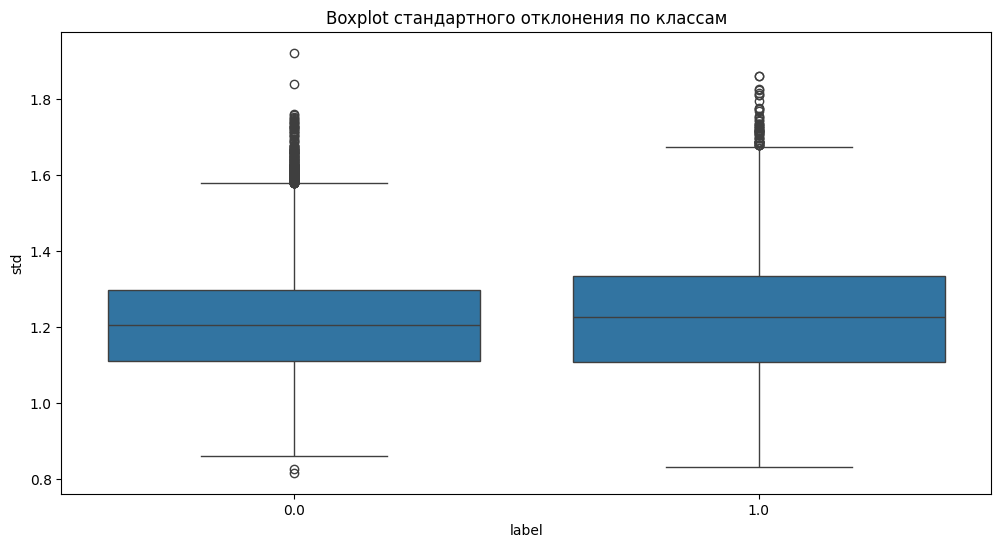

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='label', y='std')
plt.title('Boxplot стандартного отклонения по классам')
plt.show()

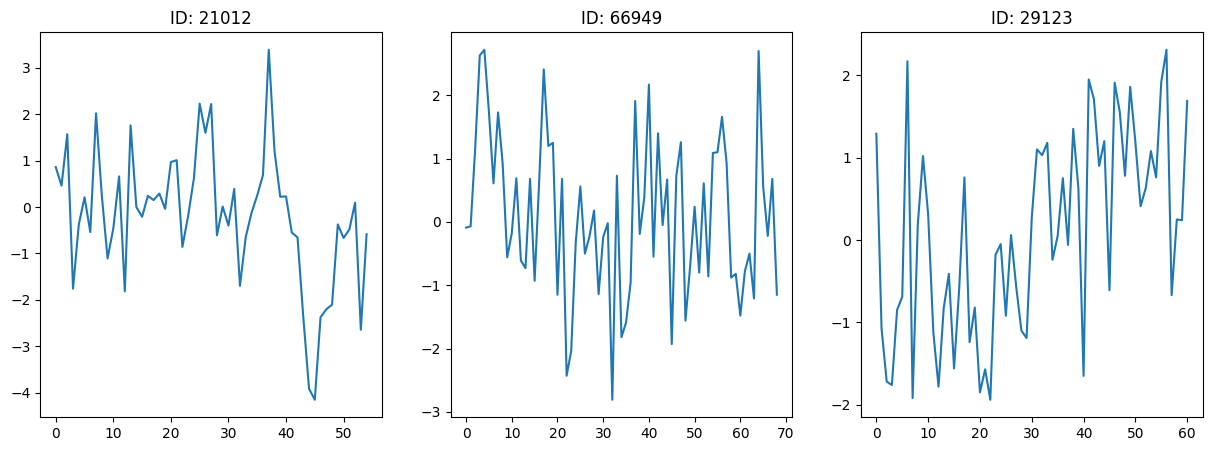

In [70]:
sample_ids = train['id'].sample(3, random_state=42).values

plt.figure(figsize=(15, 5))
for i, sample_id in enumerate(sample_ids):
    plt.subplot(1, 3, i + 1)
    series = train[train['id'] == sample_id]['values'].values[0]
    plt.plot(series)
    plt.title(f'ID: {sample_id}')
plt.show()

C:\Users\Wh1te\AppData\Local\Temp\ipykernel_16740\3751193006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['z_score_mean'] = (train['mean'] - train['mean'].mean()) / train['mean'].std()


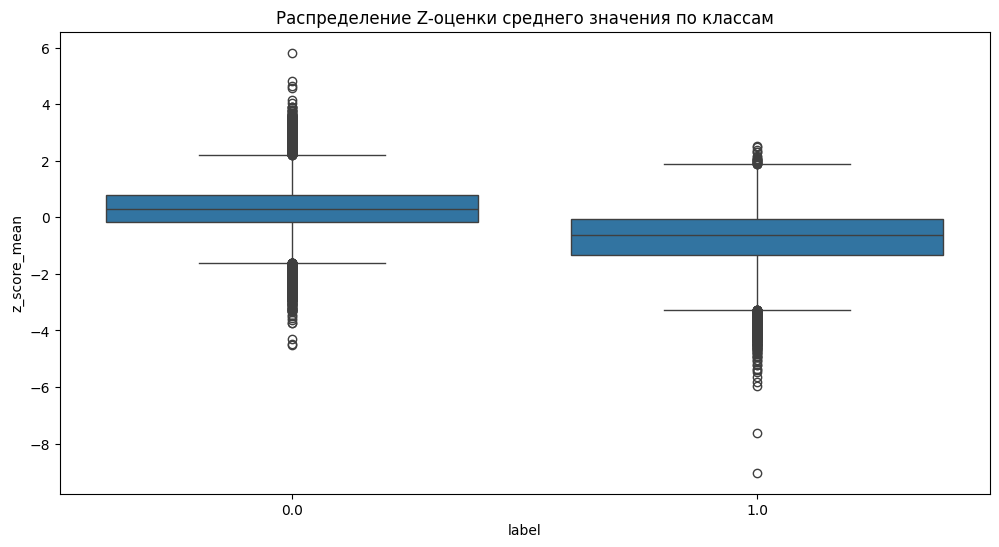

In [71]:
train['z_score_mean'] = (train['mean'] - train['mean'].mean()) / train['mean'].std()

plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='label', y='z_score_mean')
plt.title('Распределение Z-оценки среднего значения по классам')
plt.show()

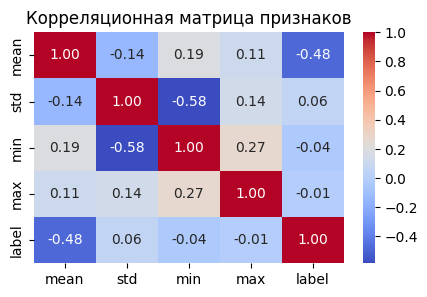

In [72]:
feature_cols = ['mean', 'std', 'min', 'max', 'label']
correlation_matrix = train[feature_cols].corr()

plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()

In [73]:
from scipy.stats import ttest_ind

class_0 = train[train['label'] == 0]['mean']
class_1 = train[train['label'] == 1]['mean']

t_stat, p_value = ttest_ind(class_0, class_1)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 154.16859623514367, P-value: 0.0


# Feature enginering

- диапазон внутри ряда макс-мин
- разница между 1 и последним
- 1ый квантиль
- 3ий квантиль
- скользящее среднее и ср. отклонение с окном 3 (5? скорее всего будет достаточно только одного из них)

In [80]:
train['range'] = train['max'] - train['min']
train['diff'] = train['values'].apply(lambda x: x[-1] - x[0])
train['q25'] = train['values'].apply(lambda x: np.percentile(x, 25))
train['q75'] = train['values'].apply(lambda x: np.percentile(x, 75))

train['rolling_mean_3'] = train['values'].apply(lambda x: np.mean(pd.Series(x).rolling(window=3).mean()))
train['rolling_std_3'] = train['values'].apply(lambda x: np.mean(pd.Series(x).rolling(window=3).std()))

C:\Users\Wh1te\AppData\Local\Temp\ipykernel_16740\3442398084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['range'] = train['max'] - train['min']
C:\Users\Wh1te\AppData\Local\Temp\ipykernel_16740\3442398084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['diff'] = train['values'].apply(lambda x: x[-1] - x[0])
C:\Users\Wh1te\AppData\Local\Temp\ipykernel_16740\3442398084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

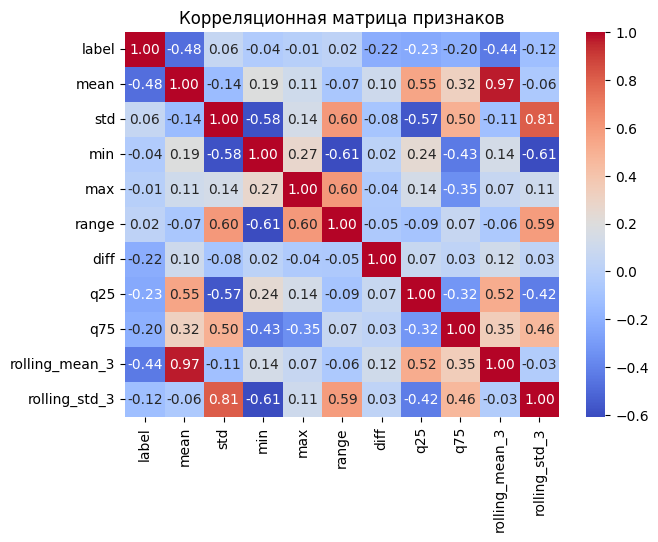

In [82]:
feature_cols = ['label', 'mean', 'std', 'min', 'max', 'range', 'diff', 'q25', 'q75', 'rolling_mean_3', 'rolling_std_3']
correlation_matrix = train[feature_cols].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()

In [84]:
train['values'].apply(lambda x: len(x)).mean()

np.float64(64.45627690459506)

In [85]:
train['rolling_mean_5'] = train['values'].apply(lambda x: np.mean(pd.Series(x).rolling(window=5).mean()))
train['rolling_std_5'] = train['values'].apply(lambda x: np.mean(pd.Series(x).rolling(window=5).std()))

C:\Users\Wh1te\AppData\Local\Temp\ipykernel_16740\2678625704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['rolling_mean_5'] = train['values'].apply(lambda x: np.mean(pd.Series(x).rolling(window=5).mean()))
C:\Users\Wh1te\AppData\Local\Temp\ipykernel_16740\2678625704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['rolling_std_5'] = train['values'].apply(lambda x: np.mean(pd.Series(x).rolling(window=5).std()))


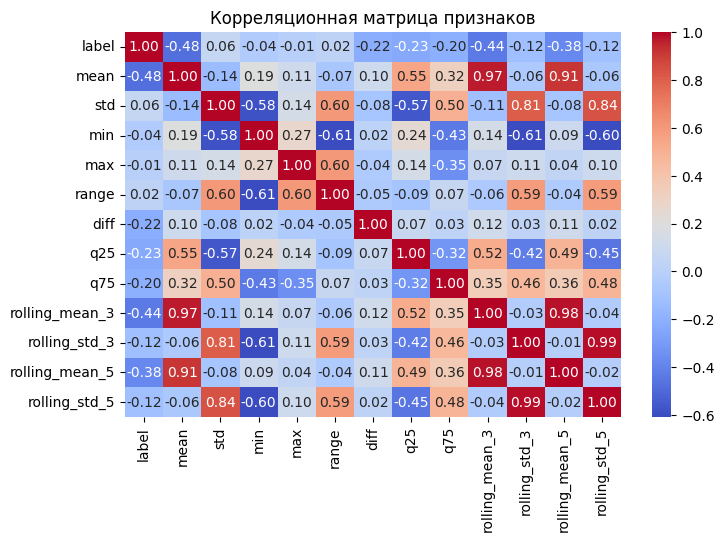

In [87]:
feature_cols = ['label', 'mean', 'std', 'min', 'max', 'range', 'diff', 'q25', 'q75',
                'rolling_mean_3', 'rolling_std_3', 'rolling_mean_5', 'rolling_std_5']
correlation_matrix = train[feature_cols].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()

больше корреляция у скользящего с окном 3, оставляем их

In [92]:
train.drop(['rolling_mean_5', 'rolling_std_5'], axis=1, inplace=True)

C:\Users\Wh1te\AppData\Local\Temp\ipykernel_16740\4133312344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['rolling_mean_5', 'rolling_std_5'], axis=1, inplace=True)


In [94]:
train.head(1)

,id,dates,values,label,mean,std,min,max,z_score_mean,range,diff,q25,q75,rolling_mean_3,rolling_std_3
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0,0.02371,1.337272,-4.84,3.49,0.506756,8.33,1.29,-0.6825,0.77,0.049944,1.16637


In [140]:
def extract_features(dates):
    features = {}
    features['count'] = len(dates)  # Количество дат
    features['year'] = [date.year for date in dates]
    features['month'] = [date.month for date in dates]
    features['day'] = [date.day for date in dates]
    return features

features_list = train['dates'].apply(extract_features)
features_df = pd.DataFrame(features_list.tolist())

train = pd.concat([train, features_df], axis=1)

train['max_day'] = train['day'].apply(np.max)
train['min_day'] = train['day'].apply(np.min)
train['median_day'] = train['day'].apply(np.median)

In [142]:
train['max_month'] = train['month'].apply(np.max)
train['min_month'] = train['month'].apply(np.min)
train['median_month'] = train['month'].apply(np.median)

In [147]:
train.describe()

,id,label,mean,std,min,max,z_score_mean,range,diff,q25,q75,rolling_mean_3,rolling_std_3,count,max_day,min_day,median_day,max_month,min_month,median_month
count,79912.000000,79912.000000,79912.000000,79912.000000,79912.000000,79912.000000,7.991200e+04,79912.000000,79912.000000,79912.000000,79912.000000,79912.000000,79912.000000,79912.000000,79912.0,79912.0,79912.0,79912.0,79912.0,79912.000000
mean,50110.770635,0.276892,-0.031980,1.214052,-2.618363,3.010728,1.138120e-17,5.629091,-0.745829,-0.850784,0.727335,-0.034618,0.821321,64.456277,1.0,1.0,1.0,12.0,1.0,6.195083
std,28858.397752,0.447465,0.109895,0.137702,0.829800,0.826934,1.000000e+00,1.003057,2.097193,0.229380,0.282160,0.111000,0.236908,15.396889,0.0,0.0,0.0,0.0,0.0,0.356692
min,0.000000,0.000000,-1.024356,0.816815,-7.950000,0.140000,-9.030230e+00,1.990000,-9.380000,-2.010068,-0.550000,-1.009555,0.029692,36.000000,1.0,1.0,1.0,12.0,1.0,6.000000
25%,25122.500000,0.000000,-0.091549,1.110445,-3.100000,2.490000,-5.420558e-01,4.990000,-2.212349,-0.994996,0.602500,-0.095030,0.691044,52.000000,1.0,1.0,1.0,12.0,1.0,6.000000
50%,50148.500000,0.000000,-0.020944,1.210340,-2.617580,2.893611,1.004266e-01,5.610000,-0.810000,-0.850000,0.762500,-0.027454,0.852031,62.000000,1.0,1.0,1.0,12.0,1.0,6.000000
75%,75068.500000,1.000000,0.032836,1.308255,-2.160000,3.380000,5.898003e-01,6.250000,0.670000,-0.710000,0.902500,0.031912,0.979316,76.000000,1.0,1.0,1.0,12.0,1.0,6.500000
max,99999.000000,1.000000,0.607917,1.921515,-0.100000,9.540000,5.822812e+00,10.936238,9.640000,0.530000,1.972500,0.622391,1.787048,97.000000,1.0,1.0,1.0,12.0,1.0,7.000000


Признаков из даты сформировать не получится... Дни и года слишком одинаковые, месяц -- слишком низкий коэф корреляции

In [149]:
train[['label', 'max_month', 'min_month', 'median_month']].corr()

,label,max_month,min_month,median_month
label,1.000000,NaN,NaN,-0.000918
max_month,NaN,NaN,NaN,NaN
min_month,NaN,NaN,NaN,NaN
median_month,-0.000918,NaN,NaN,1.000000


In [152]:
train['sum'] = train['values'].apply(np.sum)

In [153]:
train[['label', 'sum']].corr()

,label,sum
label,1.000000,-0.474207
sum,-0.474207,1.000000


# RF

In [100]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [97]:
train.columns

Index(['id', 'dates', 'values', 'label', 'mean', 'std', 'min', 'max',
       'z_score_mean', 'range', 'diff', 'q25', 'q75', 'rolling_mean_3',
       'rolling_std_3'],
      dtype='object')

In [101]:
X = train.drop(['id', 'dates', 'values', 'label'], axis=1)
y = train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [103]:
y_probs = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)
print(f'ROC AUC Score: {auc_score}')

ROC AUC Score: 0.8698723814064939


# XGBoost

In [104]:
import xgboost as xgb

In [137]:
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [138]:
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]
auc_score_xgb = roc_auc_score(y_test, y_probs_xgb)
print(f'ROC AUC Score: {auc_score_xgb}')

ROC AUC Score: 0.8803448036685759
